<a href="https://colab.research.google.com/github/shruthik55/mlprojectcarpriceprediction/blob/main/carpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataTrain=pd.read_csv(r'/content/data_train.csv')
dataTrain.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


In [ ]:
dataTrain.shape

(50000, 17)

In [ ]:
dataTest=pd.read_csv(r'/content/data_test.csv')
dataTest.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,BMW,automatic,white,115000,2012,gasoline,gasoline,4.4,sedan,False,owned,all,True,32,104,146,20450.0
1,Mercedes-Benz,manual,other,500000,1999,diesel,diesel,2.2,sedan,False,owned,rear,False,7,9,147,2600.0
2,Fiat,manual,silver,210000,2002,gasoline,gasoline,1.2,hatchback,False,owned,front,True,16,7,27,2900.0
3,Mitsubishi,automatic,violet,294000,2000,diesel,diesel,3.2,suv,False,owned,all,True,10,2,48,7500.0
4,Opel,automatic,blue,244000,1998,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,10,116,2200.0


In [ ]:
dataTest.shape

(27000, 17)

In [ ]:
dataTrain.isnull().sum()

,0
manufacturer_name,0
transmission,0
color,0
odometer_value,0
year_produced,0
engine_fuel,0
engine_type,0
engine_capacity,15
body_type,0
has_warranty,0


In [ ]:
dataTest.isnull().sum()

,0
manufacturer_name,0
transmission,0
color,0
odometer_value,0
year_produced,0
engine_fuel,0
engine_type,0
engine_capacity,5
body_type,0
has_warranty,0


In [ ]:
dataTrain=dataTrain.dropna()
dataTest=dataTest.dropna()

In [ ]:
dataTrain.isnull().sum()

,0
manufacturer_name,0
transmission,0
color,0
odometer_value,0
year_produced,0
engine_fuel,0
engine_type,0
engine_capacity,0
body_type,0
has_warranty,0


In [ ]:
dataTrain.shape

(49985, 17)

In [ ]:
dataTest.isnull().sum()

,0
manufacturer_name,0
transmission,0
color,0
odometer_value,0
year_produced,0
engine_fuel,0
engine_type,0
engine_capacity,0
body_type,0
has_warranty,0


In [ ]:
dataTest.shape

(26995, 17)

In [ ]:
dataTrain.dtypes

,0
manufacturer_name,object
transmission,object
color,object
odometer_value,int64
year_produced,int64
engine_fuel,object
engine_type,object
engine_capacity,float64
body_type,object
has_warranty,bool


<Axes: xlabel='odometer_value', ylabel='price_usd'>

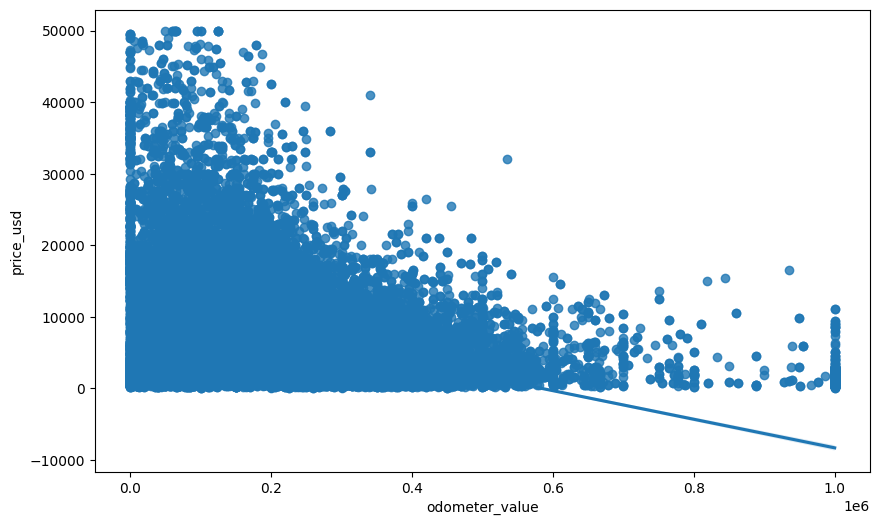

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="odometer_value", y="price_usd", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['odometer_value'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.4217541345616377  with a P-value of P = 0.0


<Axes: xlabel='year_produced', ylabel='price_usd'>

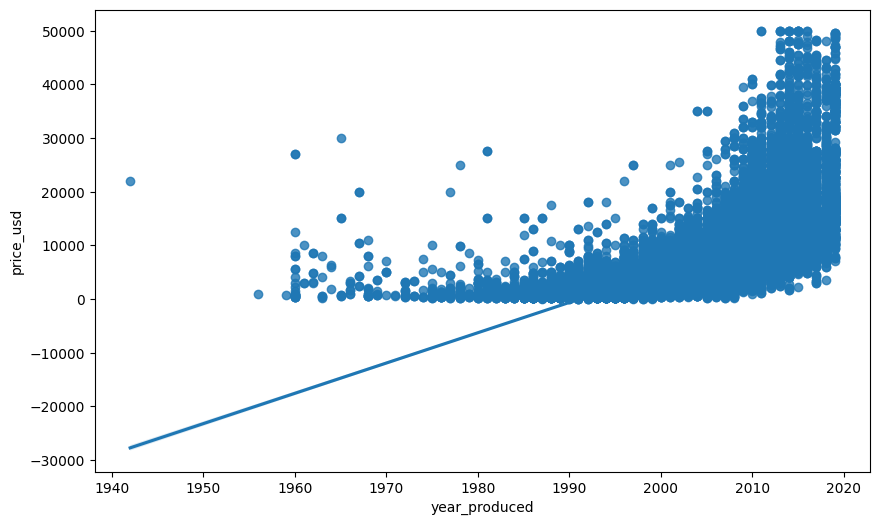

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="year_produced", y="price_usd", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['year_produced'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7045253110212668  with a P-value of P = 0.0


<Axes: xlabel='engine_capacity', ylabel='price_usd'>

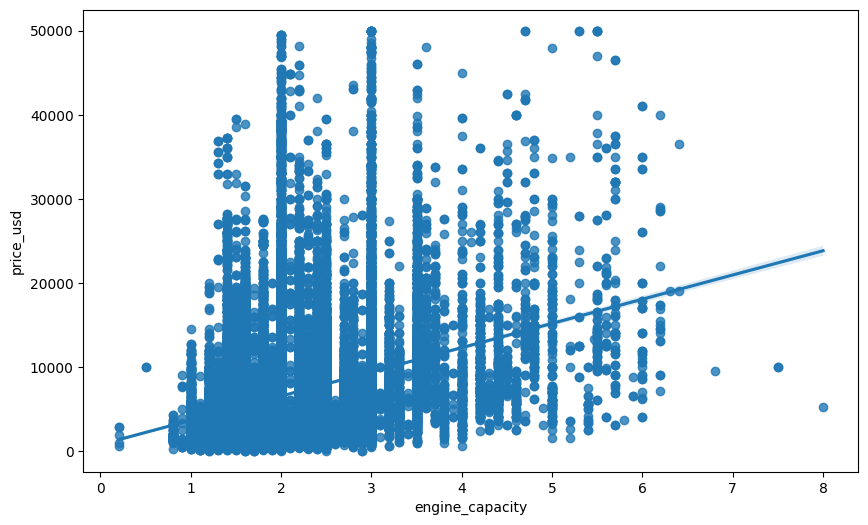

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="engine_capacity", y="price_usd", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['engine_capacity'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.30126919563202  with a P-value of P = 0.0


<Axes: xlabel='number_of_photos', ylabel='price_usd'>

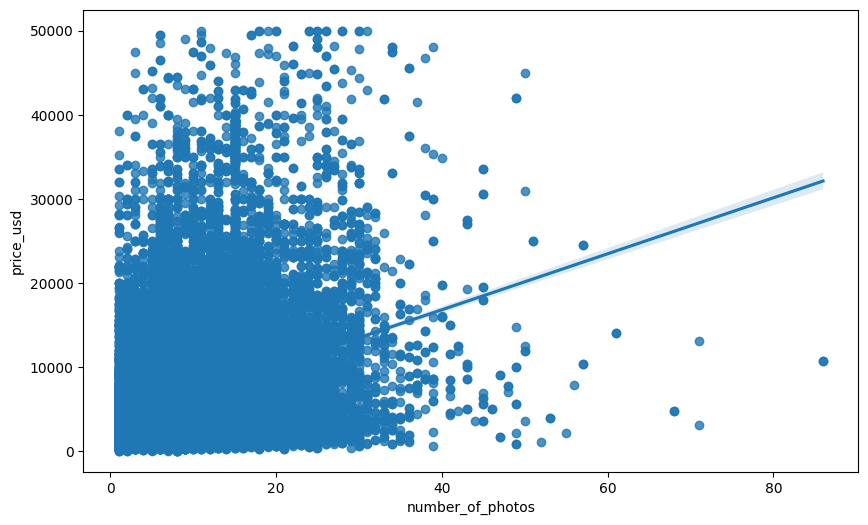

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="number_of_photos", y="price_usd", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['number_of_photos'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3168455516886231  with a P-value of P = 0.0


<Axes: xlabel='number_of_maintenance', ylabel='price_usd'>

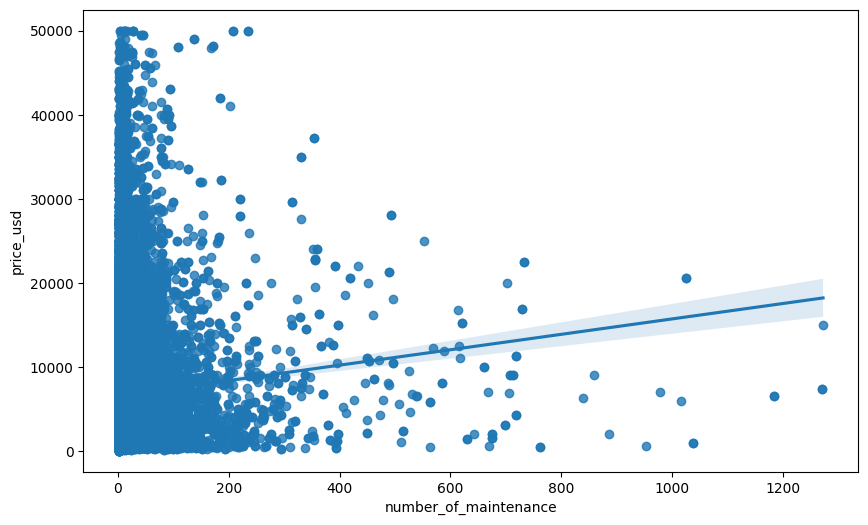

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="number_of_maintenance", y="price_usd", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['number_of_maintenance'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.05893907034331501  with a P-value of P = 1.0242198585207267e-39


<Axes: xlabel='duration_listed', ylabel='price_usd'>

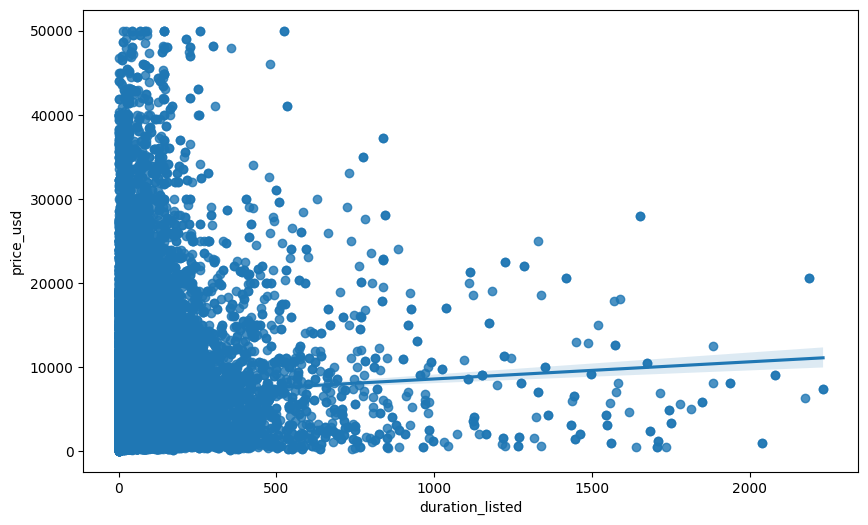

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="duration_listed", y="price_usd", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['duration_listed'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.035906816108590554  with a P-value of P = 9.73200208061904e-16


<Axes: xlabel='transmission', ylabel='price_usd'>

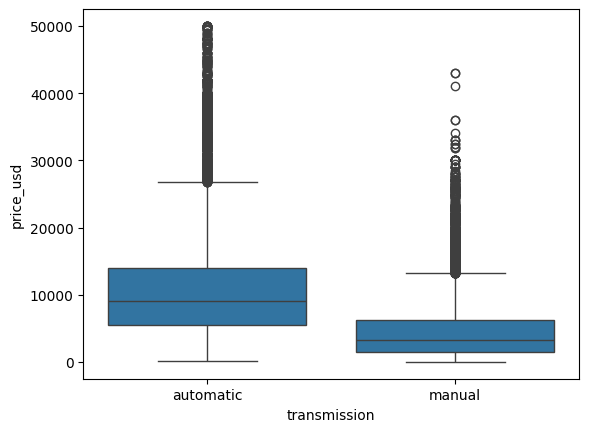

In [ ]:
sns.boxplot(x="transmission", y="price_usd", data=dataTrain)

<Axes: xlabel='color', ylabel='price_usd'>

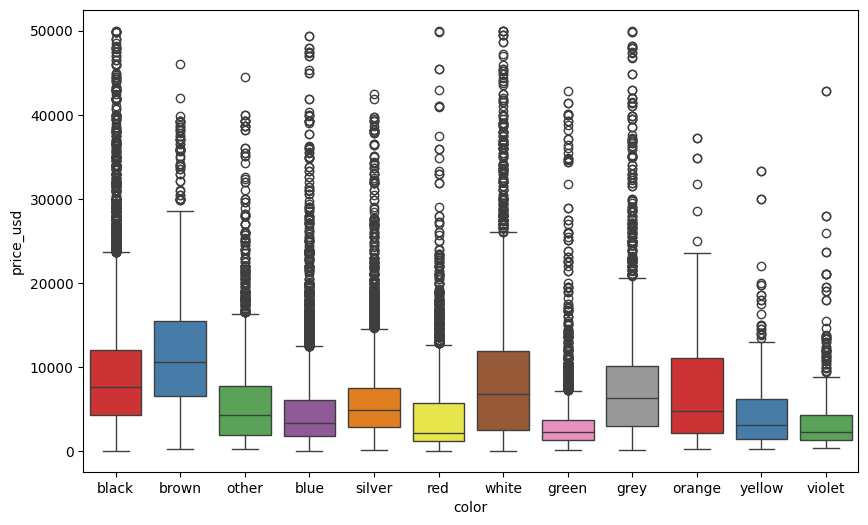

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="color", y="price_usd", data=dataTrain,palette="Set1")

<Axes: xlabel='engine_fuel', ylabel='price_usd'>

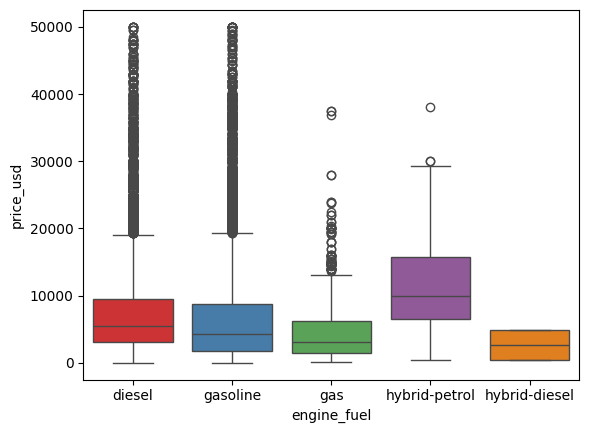

In [ ]:
sns.boxplot(x="engine_fuel", y="price_usd", data=dataTrain,palette="Set1")

<Axes: xlabel='engine_type', ylabel='price_usd'>

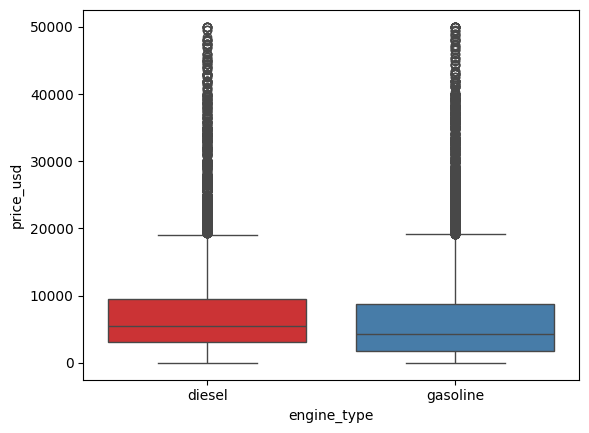

In [ ]:
sns.boxplot(x="engine_type", y="price_usd", data=dataTrain,palette="Set1")

<Axes: xlabel='body_type', ylabel='price_usd'>

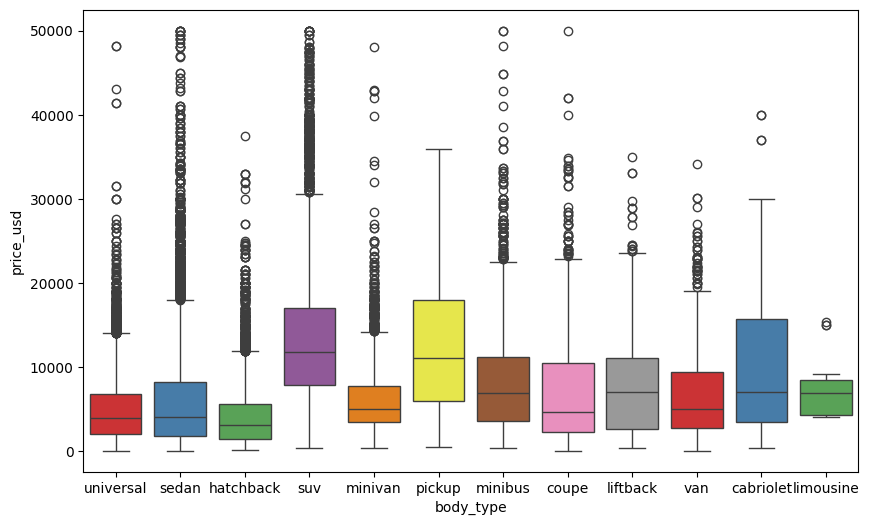

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="body_type", y="price_usd", data=dataTrain,palette="Set1")

<Axes: xlabel='has_warranty', ylabel='price_usd'>

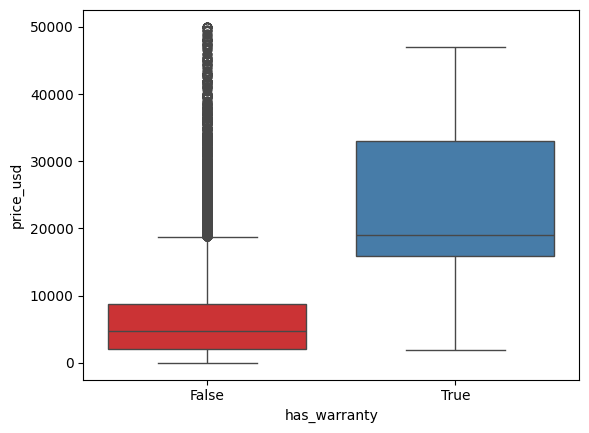

In [ ]:
sns.boxplot(x="has_warranty", y="price_usd", data=dataTrain,palette="Set1")

<Axes: xlabel='ownership', ylabel='price_usd'>

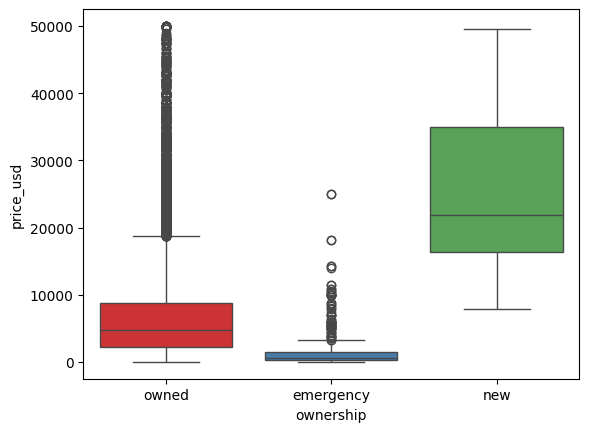

In [ ]:
sns.boxplot(x="ownership", y="price_usd", data=dataTrain,palette="Set1")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 [Text(0, 0, 'Volkswagen'),
  Text(1, 0, 'Renault'),
  Text(2, 0, 'Kia'),
  Text(3, 0, 'Opel'),
  Text(4, 0, 'Mazda'),
  Text(5, 0, 'Hyundai'),
  Text(6, 0, 'Mitsubishi'),
  Text(7, 0, 'Citroen'),
  Text(8, 0, 'Peugeot'),
  Text(9, 0, 'Dacia'),
  Text(10, 0, 'ВАЗ'),
  Text(11, 0, 'BMW'),
  Text(12, 0, 'Fiat'),
  Text(13, 0, 'Chevrolet'),
  Text(14, 0, 'Audi'),
  Text(15, 0, 'Cadillac'),
  Text(16, 0, 'Honda'),
  Text(17, 0, 'Skoda'),
  Text(18, 0, 'Toyota'),
  Text(19, 0, 'Lexus'),
  Text(20, 0, 'Mercedes-Benz'),
  Text(21, 0, 'Volvo'),
  Text(22, 0, 'Lancia'),
  Text(23, 0, 'Nissan'),
  Text(24, 0, 'Ford'),
  Text(25, 0, 'Chrysler'),
  Text(26, 0, 'Москвич'),
  Text(27,

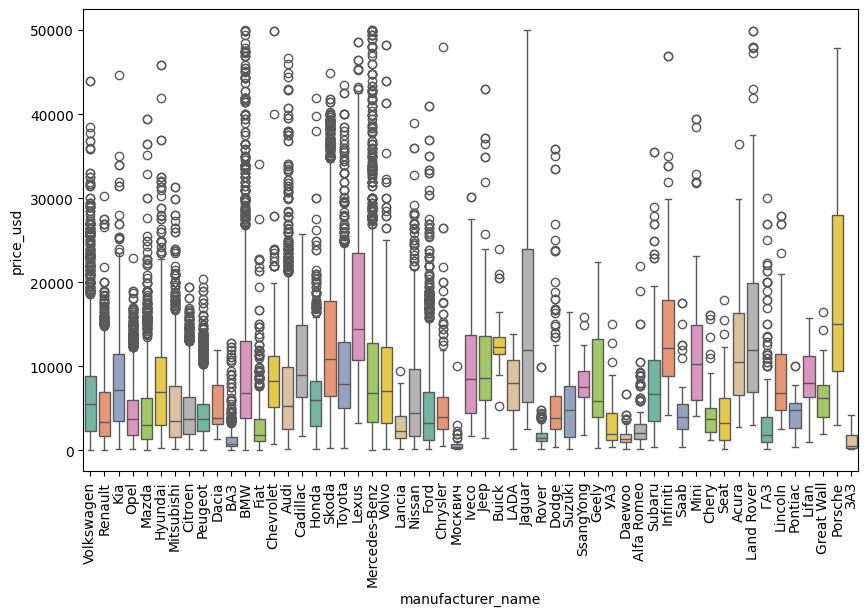

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="manufacturer_name", y="price_usd", data=dataTrain,palette="Set2")
plt.xticks(rotation=90)

In [ ]:
dataTrain.describe()

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000
mean,249275.754426,2002.942143,2.056894,9.660958,16.257417,80.749385,6651.131653
std,136342.510114,8.065809,0.675106,6.144711,41.542444,113.620345,6462.573155
min,0.000000,1942.000000,0.200000,1.000000,1.000000,0.000000,1.000000
25%,158000.000000,1998.000000,1.600000,5.000000,2.000000,23.000000,2100.000000
50%,250000.000000,2003.000000,2.000000,8.000000,5.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,12.000000,16.000000,91.000000,8963.290000
max,1000000.000000,2019.000000,8.000000,86.000000,1273.000000,2232.000000,50000.000000


In [ ]:
dataTrain.describe(include=['object'])

,manufacturer_name,transmission,color,engine_fuel,engine_type,body_type,ownership,type_of_drive
count,49985,49985,49985,49985,49985,49985,49985,49985
unique,55,2,12,5,2,12,3,3
top,Volkswagen,manual,black,gasoline,gasoline,sedan,owned,front
freq,5478,33277,9977,31255,33324,16910,48941,36001


In [ ]:
labelencoder = LabelEncoder()
dataTrain.manufacturer_name = labelencoder.fit_transform(dataTrain.manufacturer_name)
dataTrain.transmission = labelencoder.fit_transform(dataTrain.transmission)
dataTrain.color = labelencoder.fit_transform(dataTrain.color)
dataTrain.engine_fuel = labelencoder.fit_transform(dataTrain.engine_fuel)
dataTrain.engine_type = labelencoder.fit_transform(dataTrain.engine_type)
dataTrain.body_type = labelencoder.fit_transform(dataTrain.body_type)
dataTrain.has_warranty = labelencoder.fit_transform(dataTrain.has_warranty)
dataTrain.ownership = labelencoder.fit_transform(dataTrain.ownership)
dataTrain.type_of_drive = labelencoder.fit_transform(dataTrain.type_of_drive)
dataTrain.is_exchangeable = labelencoder.fit_transform(dataTrain.is_exchangeable)

In [ ]:
labelencoder1 = LabelEncoder()
dataTest.manufacturer_name = labelencoder1.fit_transform(dataTest.manufacturer_name)
dataTest.transmission = labelencoder1.fit_transform(dataTest.transmission)
dataTest.color = labelencoder1.fit_transform(dataTest.color)
dataTest.engine_fuel = labelencoder1.fit_transform(dataTest.engine_fuel)
dataTest.engine_type = labelencoder1.fit_transform(dataTest.engine_type)
dataTest.body_type = labelencoder1.fit_transform(dataTest.body_type)
dataTest.has_warranty = labelencoder1.fit_transform(dataTest.has_warranty)
dataTest.ownership = labelencoder1.fit_transform(dataTest.ownership)
dataTest.type_of_drive = labelencoder1.fit_transform(dataTest.type_of_drive)
dataTest.is_exchangeable = labelencoder1.fit_transform(dataTest.is_exchangeable)

In [ ]:
dataTrain.drop(['number_of_maintenance', 'duration_listed', 'engine_type','is_exchangeable'], axis = 1, inplace = True)

In [ ]:
dataTest.drop(['number_of_maintenance', 'duration_listed', 'engine_type','is_exchangeable'], axis = 1, inplace = True)

In [ ]:
dataTrain.head(10)

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive,number_of_photos,price_usd
0,48,0,0,130000,2016,0,1.6,10,0,2,1,17,13150.0
1,39,1,2,149000,2012,2,1.6,8,0,2,1,9,7500.0
2,23,0,2,110000,2014,2,1.6,2,0,2,1,5,12200.0
3,35,0,6,255100,2007,2,1.8,2,0,2,1,10,4950.0
4,30,1,1,650000,1999,2,2.0,8,0,2,1,5,3000.0
5,35,0,8,368632,2000,0,2.2,9,0,2,2,5,3999.0
6,39,1,7,367000,1997,2,1.4,8,0,2,1,6,940.0
7,18,0,10,135000,2012,2,2.0,8,0,2,1,7,11500.0
8,33,0,8,200800,2004,2,2.4,9,0,2,0,16,5850.0
9,9,1,8,300000,1997,2,1.8,2,0,2,1,3,700.0


In [ ]:
dataTest.head(10)

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive,number_of_photos,price_usd
0,3,0,10,115000,2012,2,4.4,8,0,2,0,32,20450.00
1,31,1,6,500000,1999,0,2.2,8,0,2,2,7,2600.00
2,13,1,8,210000,2002,2,1.2,2,0,2,1,16,2900.00
3,33,0,9,294000,2000,0,3.2,9,0,2,0,10,7500.00
4,35,0,1,244000,1998,2,1.6,8,0,2,1,9,2200.00
5,47,1,8,330000,2002,2,1.6,6,0,2,1,7,4500.00
6,43,0,3,0,2019,2,1.4,9,1,1,1,15,27412.98
7,13,1,4,233000,1996,2,1.6,2,0,2,1,5,850.00
8,40,1,1,270000,2000,2,1.8,8,0,2,1,9,2300.00
9,48,1,1,1000000,1990,0,1.9,5,0,2,2,3,3000.00


In [ ]:
x_train=dataTrain.iloc[:,0:11]
y_train=dataTrain.iloc[:,12]
x_test=dataTest.iloc[:,0:11]
y_test=dataTest.iloc[:,12]


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[ 1.27263915e+00, -1.40919916e+00, -1.24072991e+00, ...,
        -1.10733405e-01,  1.39030693e-01, -1.53938894e-03],
       [ 7.05932443e-01,  7.09622904e-01, -6.83966351e-01, ...,
        -1.10733405e-01,  1.39030693e-01, -1.53938894e-03],
       [-3.01546140e-01, -1.40919916e+00, -6.83966351e-01, ...,
        -1.10733405e-01,  1.39030693e-01, -1.53938894e-03],
       ...,
       [-9.31220255e-01,  7.09622904e-01,  7.07942556e-01, ...,
        -1.10733405e-01,  1.39030693e-01, -1.53938894e-03],
       [-1.56089437e+00, -1.40919916e+00, -1.27202788e-01, ...,
        -1.10733405e-01,  1.39030693e-01,  1.88736081e+00],
       [ 1.33560656e+00, -1.40919916e+00,  4.29560774e-01, ...,
        -1.10733405e-01,  1.39030693e-01, -1.53938894e-03]])

In [ ]:
rg = LinearRegression()
mdl=rg.fit(x_train,y_train)

In [ ]:
y_pred1 = rg.predict(x_test)

In [ ]:
r1=rg.score(x_train,y_train)
print('The R-square for Multiple Linear regression is: ', r1)

The R-square for Multiple Linear regression is:  0.6386994104921377


In [ ]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  14324814.092698824


In [ ]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  2471.057101663589


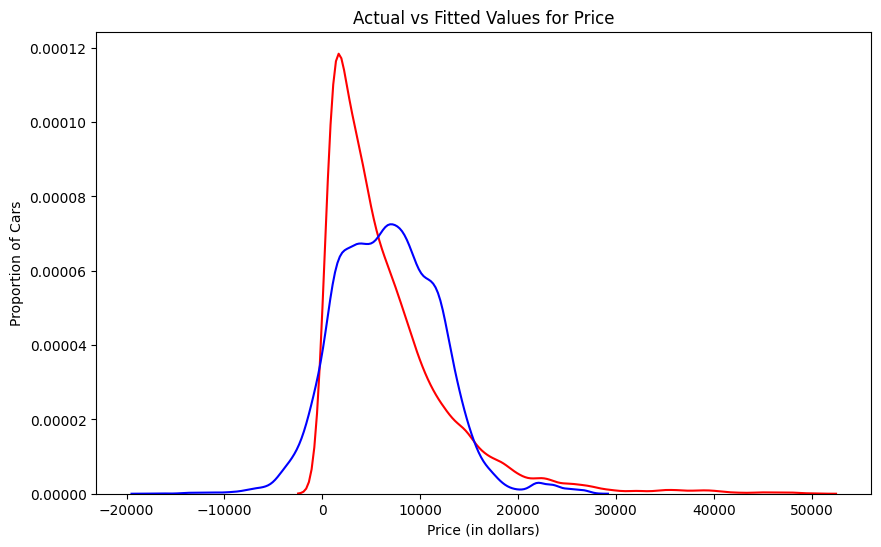

In [ ]:
plt.figure(figsize=(10,6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
rf = RandomForestRegressor()
model=rf.fit(x_train,y_train)

In [ ]:
y_pred2 = rf.predict(x_test)

In [ ]:
r2=rf.score(x_train,y_train)
print('The R-square for Random Forest is: ', r2)

The R-square for Random Forest is:  0.993311114364522


In [ ]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  1614732.701258373


In [ ]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  669.788151060563


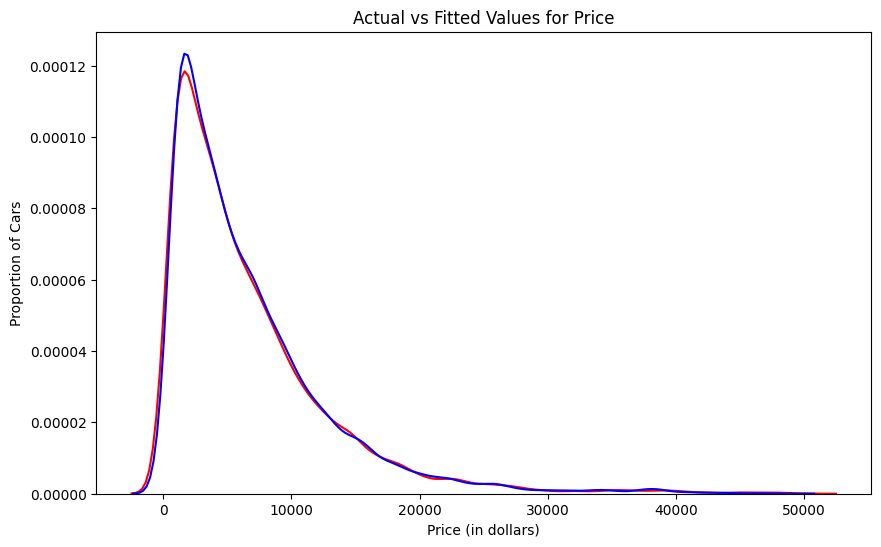

In [ ]:
plt.figure(figsize=(10,6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
xgb_r = xg.XGBRegressor()
xgb_r.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred4 = xgb_r.predict(x_test)

In [ ]:
mae4= mean_absolute_error(y_test, y_pred4)
print('The mean absolute error for XGBoost Model is: ', mae4)

The mean absolute error for XGBoost Model is:  965.7016357619103


In [ ]:
mse4 = mean_squared_error(y_test, y_pred4)
print('The mean square error forXGBoost Model is: ', mse4)

The mean square error forXGBoost Model is:  2349568.959086785


In [ ]:
r4=xgb_r.score(x_train,y_train)
print('The R-square for XGBoost is: ', r4)

The R-square for XGBoost is:  0.9582761518370517


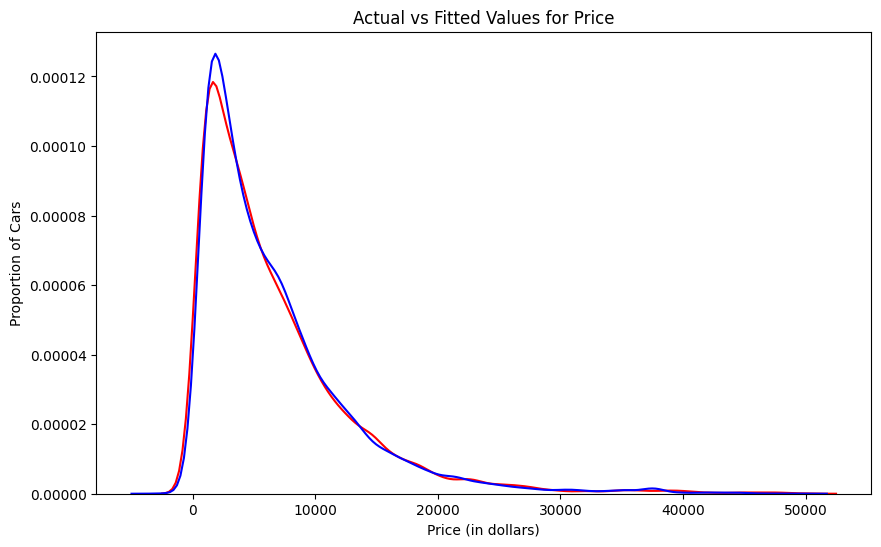

In [ ]:
plt.figure(figsize=(10,6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred4, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
scores = [('MLR', mae1,r1,mse1),
          ('Random Forest', mae2,r2,mse2),
          ('XGBoost', mae4,r4,mse4)
         ]

In [ ]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score','R Score','MSE Score'])
mae

,Model,MAE Score,R Score,MSE Score
0,MLR,2471.057102,0.638699,1.432481e+07
1,Random Forest,669.788151,0.993311,1.614733e+06
2,XGBoost,965.701636,0.958276,2.349569e+06


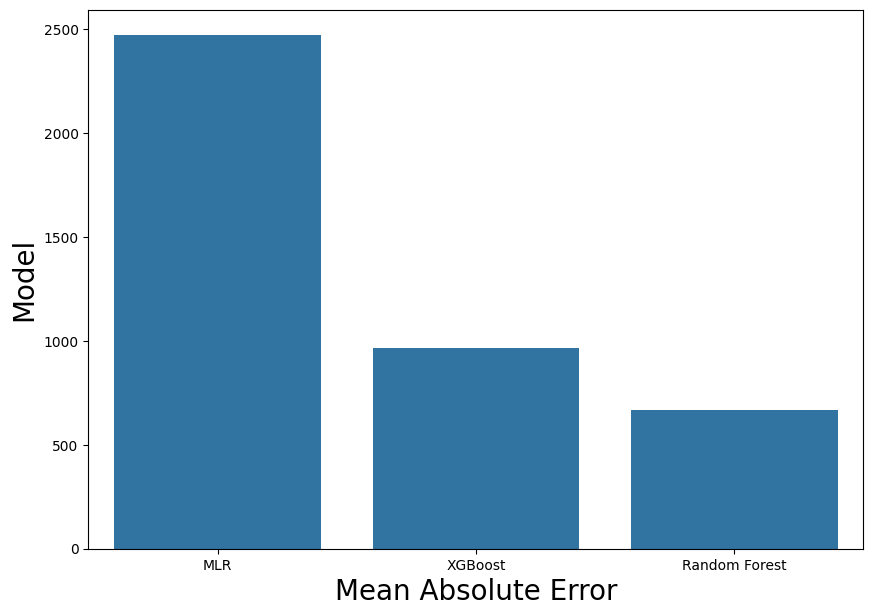

In [ ]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Mean Absolute Error', size=20)
axe.set_ylabel('Model', size=20)

plt.show()

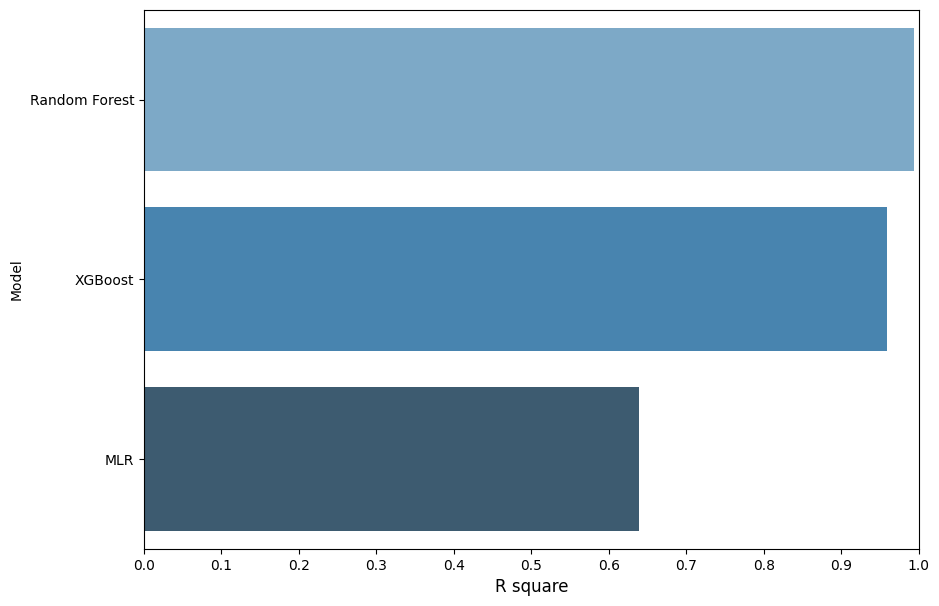

In [ ]:
mae.sort_values(by=['R Score'], ascending=False, inplace=True)

f, axes = plt.subplots(1,figsize=(10,7))

sns.barplot(x='R Score', y='Model', data = mae, palette='Blues_d', ax = axes)
#axes[0].set(xlabel='Region', ylabel='Charges')
axes.set_xlabel('R square', size=12)
axes.set_ylabel('Model')
axes.set_xlim(0,1.0)
axes.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

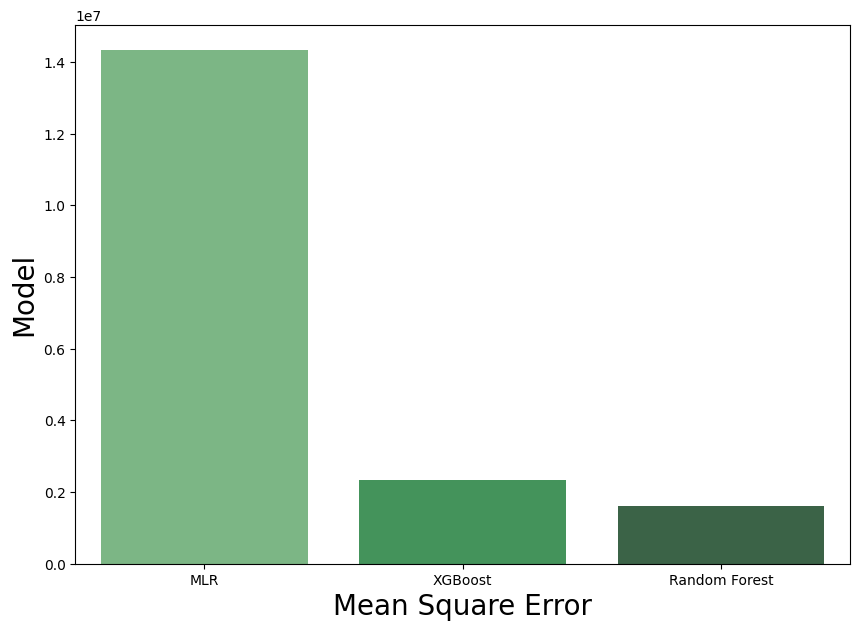

In [ ]:
mae.sort_values(by=(['MSE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MSE Score'], palette="Greens_d",ax = axe)
axe.set_xlabel('Mean Square Error', size=20)
axe.set_ylabel('Model', size=20)

plt.show()